In [1]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

api = wandb.Api()

ENTITY = "joshuadariuspina-georgia-state-university"

PROJECTS = [
    "rolling-cv",
    "campus-burglary-risk",
    "updated_burglary_forecast",
    "atl-crime-hourly-forecast",
    "atl-crime-risk"
]

all_rows = []

for project in PROJECTS:
    print(f"Fetching project → {project}")
    runs = api.runs(f"{ENTITY}/{project}")
    
    for r in runs:
        all_rows.append({
            "project": project,
            "run_id": r.id,
            "model": r.config.get("model"),
            "dataset": r.config.get("dataset"),
            "MAE": r.summary.get("Mean_MAE"),
            "RMSE": r.summary.get("Mean_RMSE"),
            "R2": r.summary.get("Mean_R2"),
            "MAPE": r.summary.get("Mean_MAPE"),
            "timestamp": r.created_at,
            "url": r.url,
        })

df_all = pd.DataFrame(all_rows)
print(f"\nLoaded {len(df_all)} W&B runs.")
df_all.head()


Fetching project → rolling-cv
Fetching project → campus-burglary-risk
Fetching project → updated_burglary_forecast
Fetching project → atl-crime-hourly-forecast
Fetching project → atl-crime-risk


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


ValueError: Could not find run <Run joshuadariuspina-georgia-state-university/atl-crime-risk/n5970v4m (finished)>

In [2]:
leaderboard_full = (
    df_all.dropna(subset=["MAE"])
         .sort_values("MAE")
         .reset_index(drop=True)
)

display(leaderboard_full)


,project,run_id,model,dataset,MAE,RMSE,R2,MAPE,timestamp,url
0,rolling-cv,cky70tbu,CatBoostRegressor,npu_dense_panel,0.006253,0.061313,0.970875,1.290952e+06,2025-12-02T18:55:56Z,https://wandb.ai/joshuadariuspina-georgia-stat...
1,rolling-cv,8tsbfhfx,CatBoostRegressor,npu_dense_panel,0.006253,0.061313,0.970875,1.290952e+06,2025-12-02T14:32:11Z,https://wandb.ai/joshuadariuspina-georgia-stat...
2,rolling-cv,wfcwxyrw,RandomForest,npu_dense_panel,0.006975,0.069141,0.962950,4.709259e-01,2025-12-02T14:28:15Z,https://wandb.ai/joshuadariuspina-georgia-stat...
3,rolling-cv,g77jgpsi,RandomForest,npu_dense_panel,0.006975,0.069141,0.962950,4.709259e-01,2025-12-02T18:50:47Z,https://wandb.ai/joshuadariuspina-georgia-stat...
4,rolling-cv,6s1jtfv7,XGBRegressor,npu_dense_panel,0.007885,0.069354,0.962676,5.802362e+06,2025-12-02T14:29:03Z,https://wandb.ai/joshuadariuspina-georgia-stat...
...,...,...,...,...,...,...,...,...,...,...
140,rolling-cv,thixsfmz,NaiveMean,None,0.236910,0.410422,-0.000653,1.719934e+01,2025-12-02T11:34:41Z,https://wandb.ai/joshuadariuspina-georgia-stat...
141,rolling-cv,ons8o30y,NaiveMean,None,0.236910,0.410422,-0.000653,1.719934e+01,2025-12-02T11:31:16Z,https://wandb.ai/joshuadariuspina-georgia-stat...
142,rolling-cv,19sezlcz,NaiveMean,None,0.236910,0.410422,-0.000653,1.719934e+01,2025-12-02T11:37:59Z,https://wandb.ai/joshuadariuspina-georgia-stat...
143,rolling-cv,ob8cdkny,NaiveMean,None,0.236910,0.410422,-0.000653,1.719934e+01,2025-12-02T11:41:19Z,https://wandb.ai/joshuadariuspina-georgia-stat...


In [3]:
leaderboard_by_model = (
    df_all.groupby("model")[["MAE","RMSE","R2"]]
          .mean()
          .sort_values("MAE")
)

display(leaderboard_by_model)


,MAE,RMSE,R2
model,,,
CatBoostRegressor,0.035541,0.127744,0.873449
RandomForest,0.068190,0.205952,0.734632
CatBoost,0.072184,0.205518,0.749199
XGBRegressor,0.073205,0.206664,0.733748
LinearRegression,0.120347,0.262256,0.465253
NaiveLastHour,0.164721,0.460898,-0.277544
BaselineMean,0.217292,0.384938,-0.000430
SeasonalWeekly,0.218504,0.411096,-0.006095
PoissonGLM,0.219837,0.399519,0.051728


In [4]:
leaderboard_by_data = (
    df_all.groupby("dataset")[["MAE","RMSE","R2"]]
          .mean()
          .sort_values("MAE")
)

display(leaderboard_by_data)


,MAE,RMSE,R2
dataset,,,
npu_dense_panel,0.048080,0.136824,0.755128
npu_sparse_panel,0.134009,0.288706,0.450535
data/processed/apd/npu_dense_panel.parquet,NaN,NaN,NaN


In [ ]:
best_per_project = df_all.loc[
    df_all.groupby("project")["MAE"].idxmin()
]

display(best_per_project)

KeyError: '[nan] not in index'

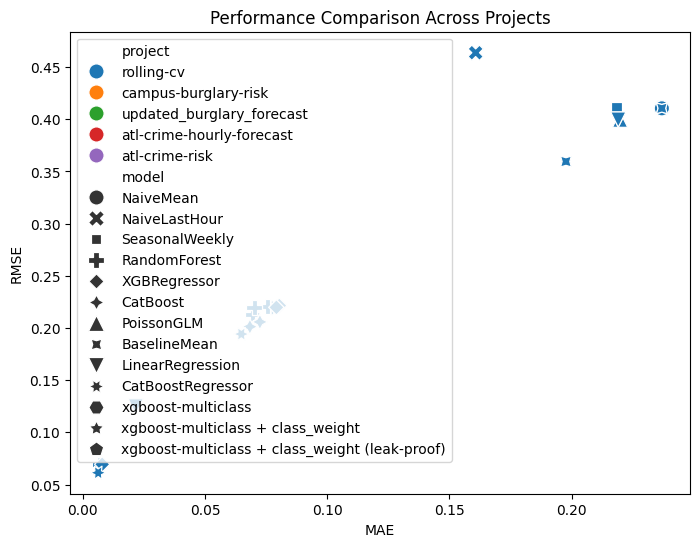

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_all,
    x="MAE",
    y="RMSE",
    hue="project",
    style="model",
    s=120
)
plt.title("Performance Comparison Across Projects")
plt.show()


In [7]:
leaderboard_full.to_csv("leaderboard_full.csv", index=False)
leaderboard_by_model.to_csv("leaderboard_by_model.csv")
leaderboard_by_data.to_csv("leaderboard_by_dataset.csv")
best_per_project.to_csv("best_per_project.csv", index=False)


NameError: name 'best_per_project' is not defined